# SonghanYu_Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](./readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

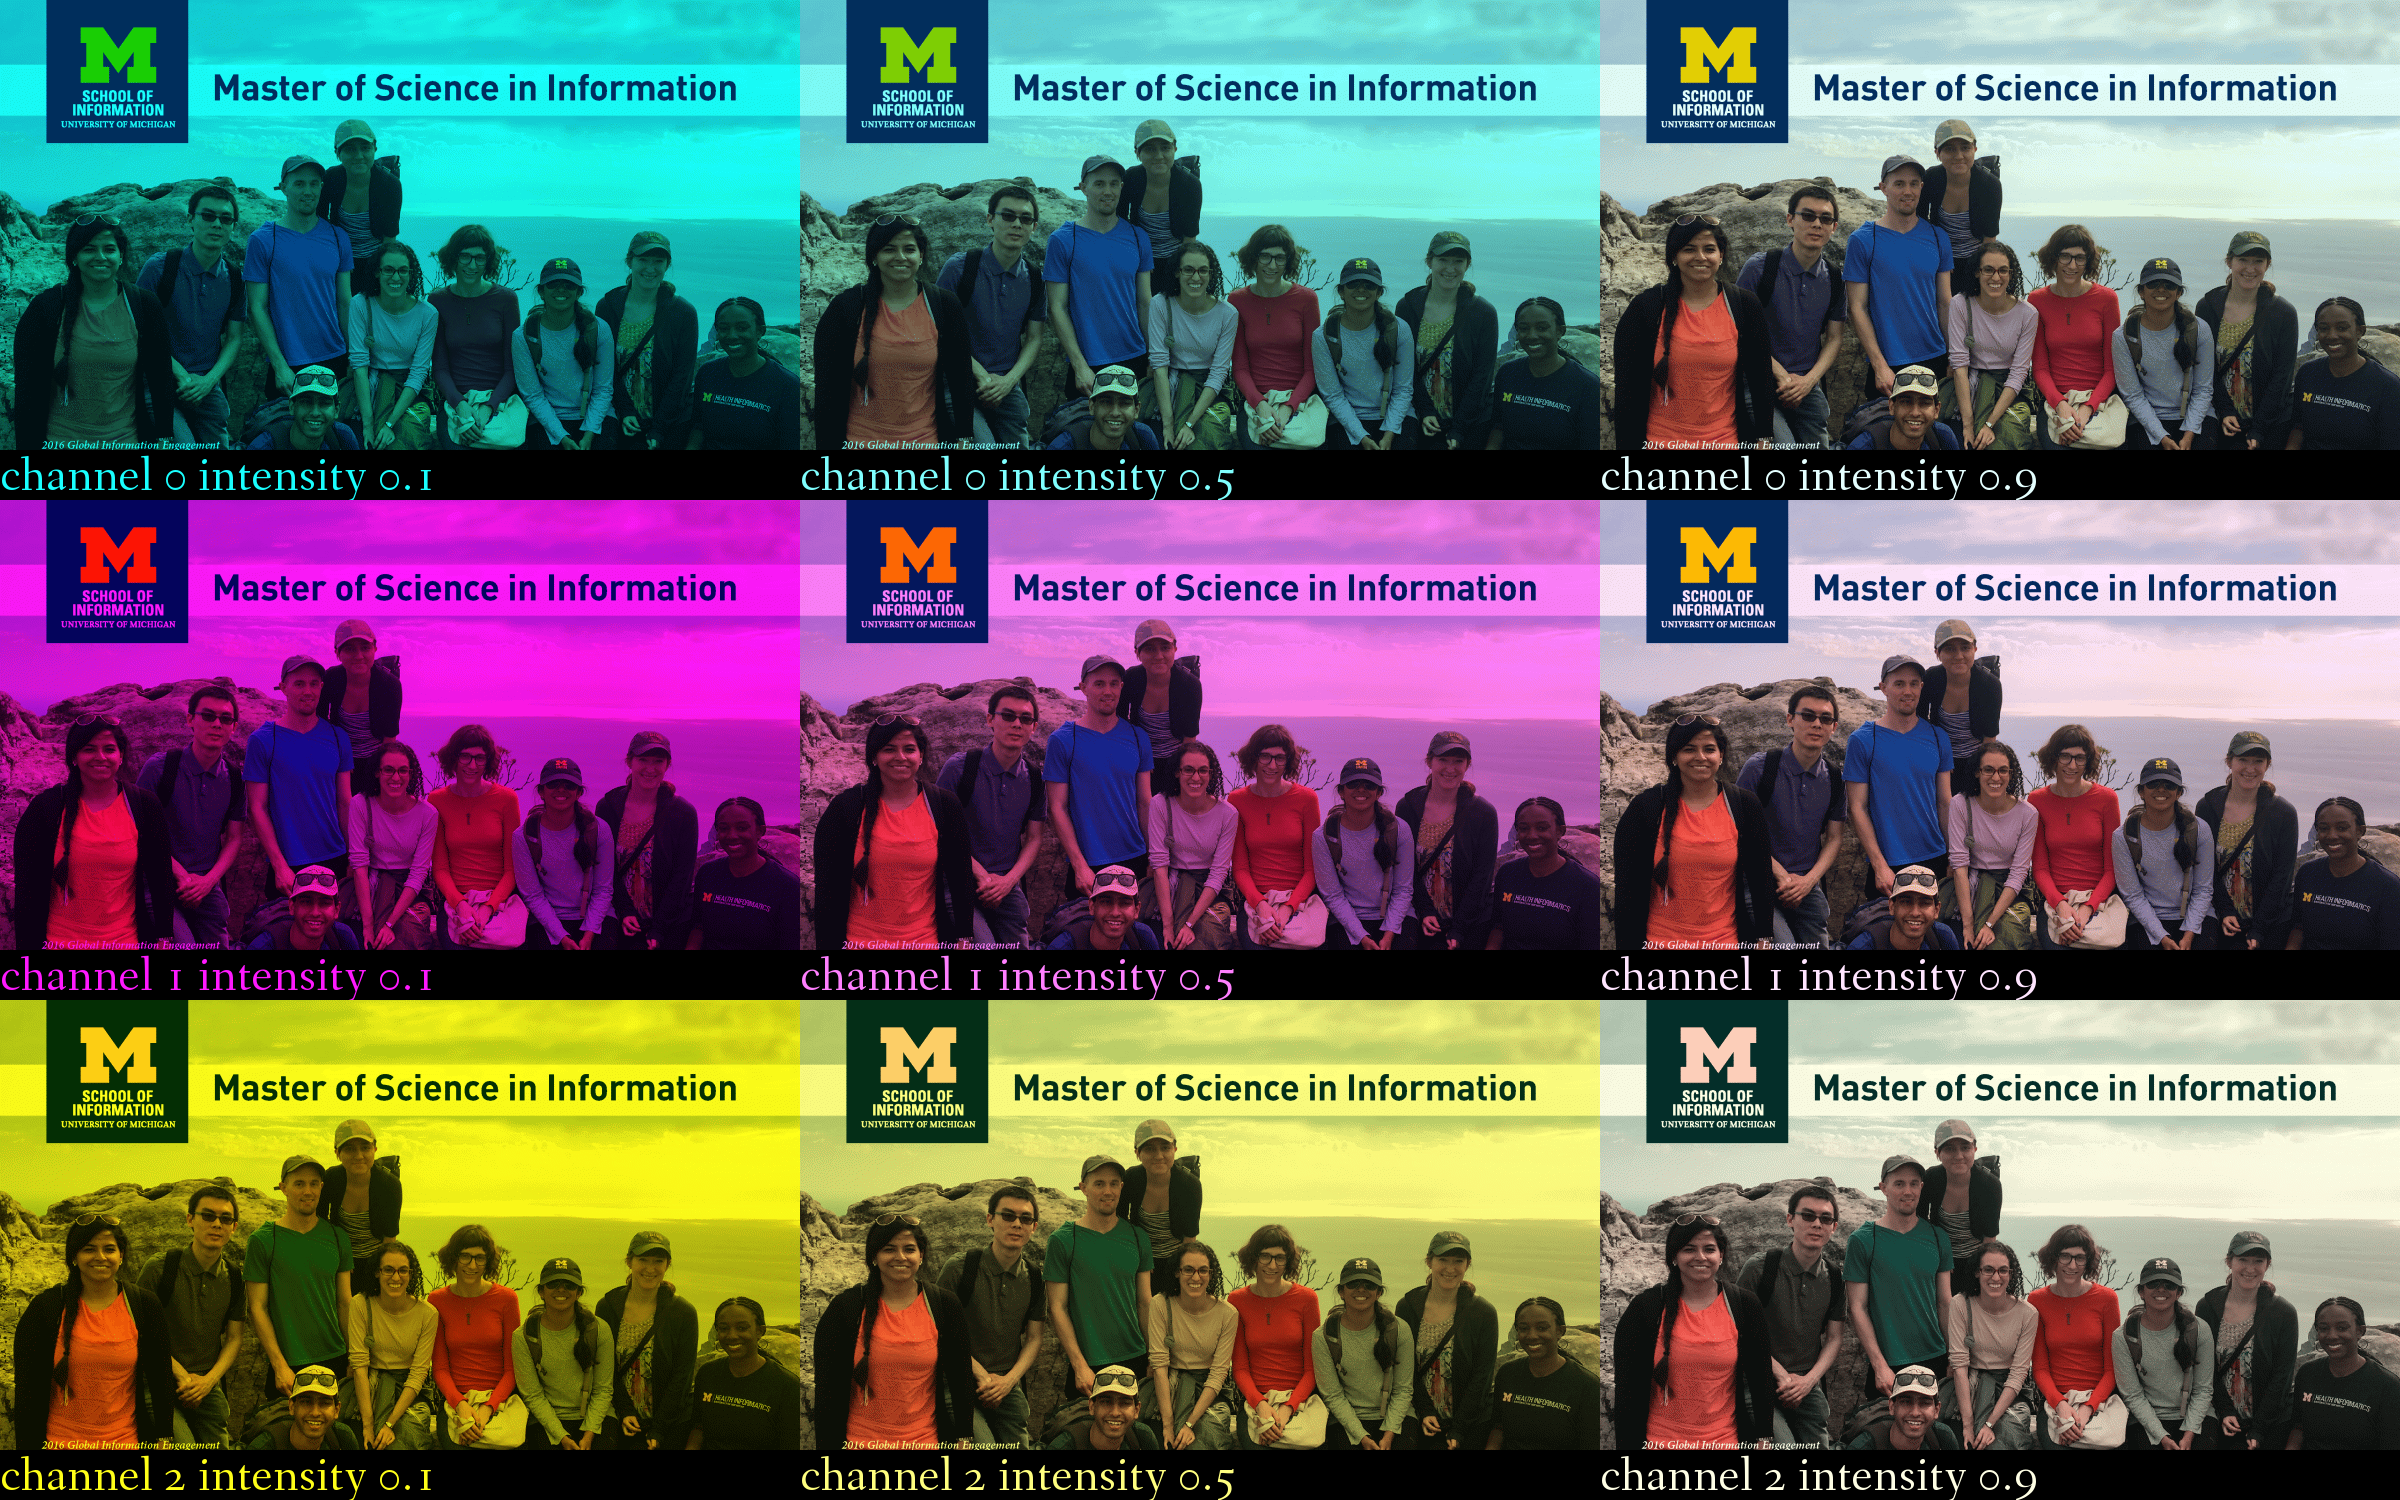

In [7]:
import PIL
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

file = "readonly/msi_recruitment.gif"
image = Image.open(file).convert('RGB')  # 800x450

ratio1 = 0.1 ; ratio2 = 0.1 ; ratio3 = 0.1 ; channel = 0
ratio_delta = 0.4
images = []


for r in range(9):
    if r <= 2: 
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,455), 'channel 0 intensity ' + str(ratio1), fill=(255,255,255), font=font)
        r, g, b = pic.split()
        r = r.point(lambda i: i * ratio1)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio1 += ratio_delta

    elif 2< r <=5:
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,455), 'channel 1 intensity ' + str(ratio2), fill=(255,255,255), font=font)
        r, g, b = pic.split() 
        g = g.point(lambda i: i * ratio2)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio2 += ratio_delta
    
    elif 5< r <=8:
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,455), 'channel 2 intensity ' + str(ratio3), fill=(255,255,255), font=font)
        r, g, b = pic.split() 
        b= g.point(lambda i: i * ratio3)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio3 += ratio_delta

    images.append(im)

#images[8]

# make a contact sheet
contact_sheet=PIL.Image.new(images[0].mode, (images[0].width*3,images[0].height*3))

# canvas start original point
x=0
y=0

for img in images:
    contact_sheet.paste(img, (x,y))
    if x + images[0].width == contact_sheet.width:
        x = 0
        y += images[0].height
    else:
        x += images[0].width

display(contact_sheet)


## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.